In [1]:
import numpy as np
import pandas as pd
import time
from sklearn.metrics import pairwise
from scipy.spatial import distance
from scipy.cluster import hierarchy

In [2]:
X = np.array([[-77, 38],
              [-84, 33],
              [-122, 45],
              [-111, 40],
              [-112, 33]])

### расчет попарных расстояний с помощью scipy.spatial.distance

In [3]:
%%time
d1 = distance.pdist(X, metric='euclidean')

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 98.9 µs


In [5]:
pd.DataFrame(d1)

,0
0,8.602325
1,45.541190
2,34.058773
3,35.355339
4,39.849718
5,27.892651
6,28.000000
7,12.083046
8,15.620499
9,7.071068


### расчет попарных расстояний с помощью sklearn.metrics.pairwise

In [6]:
%%time
d2 = pairwise.pairwise_distances(X, metric='euclidean')

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 28.8 ms


In [7]:
pd.DataFrame(d2)

,0,1,2,3,4
0,0.000000,8.602325,45.541190,34.058773,35.355339
1,8.602325,0.000000,39.849718,27.892651,28.000000
2,45.541190,39.849718,0.000000,12.083046,15.620499
3,34.058773,27.892651,12.083046,0.000000,7.071068
4,35.355339,28.000000,15.620499,7.071068,0.000000


- **scipy.spatial.distance** возвращает верхний треугольник полной матрицы расстояний
- **sklearn.metrics.pairwise** возвращает полную матрицу расстояний

С помощью метода **scipy.spatial.distance.squareform** можно преобразовать векторную форму(верхний треугольник) в полную форму(квадратную)

In [8]:
pd.DataFrame(distance.squareform(d1))

,0,1,2,3,4
0,0.000000,8.602325,45.541190,34.058773,35.355339
1,8.602325,0.000000,39.849718,27.892651,28.000000
2,45.541190,39.849718,0.000000,12.083046,15.620499
3,34.058773,27.892651,12.083046,0.000000,7.071068
4,35.355339,28.000000,15.620499,7.071068,0.000000


In [9]:
pd.DataFrame(distance.squareform(d2))

,0
0,8.602325
1,45.541190
2,34.058773
3,35.355339
4,39.849718
5,27.892651
6,28.000000
7,12.083046
8,15.620499
9,7.071068


### Для рассчета матрицы сходства используется метод scipy.cluster.hierarchy.linkage
Этому методу на вход подается либо полная либо треугольная матрица

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

/home/dima/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [11]:
d1_linkage = hierarchy.linkage(d1)
pd.DataFrame(d1_linkage)

,0,1,2,3
0,3.0,4.0,7.071068,2.0
1,0.0,1.0,8.602325,2.0
2,2.0,5.0,12.083046,3.0
3,6.0,7.0,27.892651,5.0


In [12]:
d2_linkage = hierarchy.linkage(d2)
pd.DataFrame(d2_linkage)

,0,1,2,3
0,3.0,4.0,10.686729,2.0
1,0.0,1.0,16.508026,2.0
2,2.0,5.0,25.296445,3.0
3,6.0,7.0,57.483190,5.0


значения в матрицах разные но масштаб одинаковый

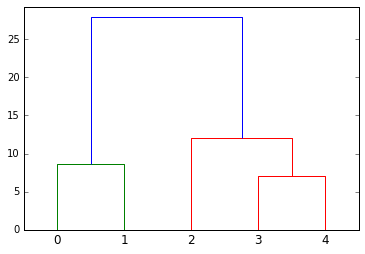

In [13]:
Z = hierarchy.dendrogram(d1_linkage)

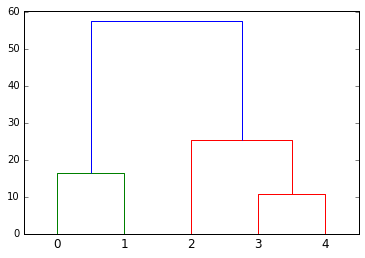

In [14]:
Z = hierarchy.dendrogram(d2_linkage)

### расстояние между двумя векторами можно получить 2-мя способами

In [15]:
difference_norm1 = distance.cdist(X[0:1],X[2:3], metric='euclidean').item()
difference_norm2 = np.linalg.norm(X[0:1] - X[2:3])

difference_norm1 == difference_norm2

True